In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import files
files.upload()

Saving drug200.csv to drug200 (4).csv


{'drug200.csv': b'Age,Sex,BP,Cholesterol,Na_to_K,Drug\r\n23,F,HIGH,HIGH,25.355,DrugY\r\n47,M,LOW,HIGH,13.093,drugC\r\n47,M,LOW,HIGH,10.114,drugC\r\n28,F,NORMAL,HIGH,7.798,drugX\r\n61,F,LOW,HIGH,18.043,DrugY\r\n22,F,NORMAL,HIGH,8.607,drugX\r\n49,F,NORMAL,HIGH,16.275,DrugY\r\n41,M,LOW,HIGH,11.037,drugC\r\n60,M,NORMAL,HIGH,15.171,DrugY\r\n43,M,LOW,NORMAL,19.368,DrugY\r\n47,F,LOW,HIGH,11.767,drugC\r\n34,F,HIGH,NORMAL,19.199,DrugY\r\n43,M,LOW,HIGH,15.376,DrugY\r\n74,F,LOW,HIGH,20.942,DrugY\r\n50,F,NORMAL,HIGH,12.703,drugX\r\n16,F,HIGH,NORMAL,15.516,DrugY\r\n69,M,LOW,NORMAL,11.455,drugX\r\n43,M,HIGH,HIGH,13.972,drugA\r\n23,M,LOW,HIGH,7.298,drugC\r\n32,F,HIGH,NORMAL,25.974,DrugY\r\n57,M,LOW,NORMAL,19.128,DrugY\r\n63,M,NORMAL,HIGH,25.917,DrugY\r\n47,M,LOW,NORMAL,30.568,DrugY\r\n48,F,LOW,HIGH,15.036,DrugY\r\n33,F,LOW,HIGH,33.486,DrugY\r\n28,F,HIGH,NORMAL,18.809,DrugY\r\n31,M,HIGH,HIGH,30.366,DrugY\r\n49,F,NORMAL,NORMAL,9.381,drugX\r\n39,F,LOW,NORMAL,22.697,DrugY\r\n45,M,LOW,HIGH,17.951,DrugY\r\

In [3]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv('drug200.csv')


# **EDA**

In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [9]:
df.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [10]:
df['Drug'] = df['Drug'].replace('DrugY','Y')
df['Drug'] = df['Drug'].replace('drugC','C')
df['Drug'] = df['Drug'].replace('drugX','X')
df['Drug'] = df['Drug'].replace('drugA','A')
df['Drug'] = df['Drug'].replace('drugB','B')

In [11]:
df.Drug.unique()

array(['Y', 'C', 'X', 'A', 'B'], dtype=object)

# **Data Visualization**

In [12]:
Cholesterol = df["Cholesterol"].value_counts()
Cholesterol

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [13]:
Drug = df["Drug"].sort_values()
Drug

66     A
144    A
118    A
110    A
36     A
      ..
74     Y
73     Y
71     Y
68     Y
99     Y
Name: Drug, Length: 200, dtype: object

In [14]:
df["Cholesterol"].value_counts(normalize=True)

HIGH      0.515
NORMAL    0.485
Name: Cholesterol, dtype: float64

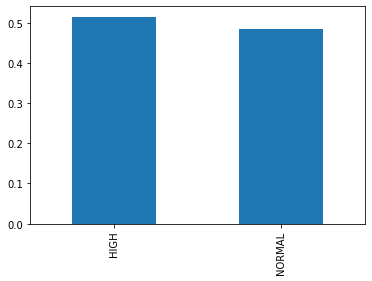

In [15]:
df["Cholesterol"].value_counts(normalize=True).plot.bar();

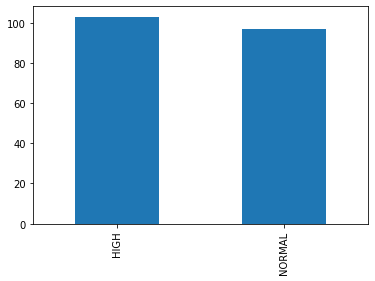

In [16]:
df["Cholesterol"].value_counts().plot.bar();

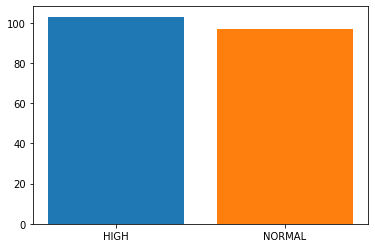

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar("HIGH", Cholesterol["HIGH"])

plt.bar("NORMAL", Cholesterol["NORMAL"])

plt.show();

In [18]:
X = df.loc[:, ["Sex", "BP", "Cholesterol", "Na_to_K"]]
y = df.loc[:, "Drug"]

In [19]:
X.head()

,Sex,BP,Cholesterol,Na_to_K
0,F,HIGH,HIGH,25.355
1,M,LOW,HIGH,13.093
2,M,LOW,HIGH,10.114
3,F,NORMAL,HIGH,7.798
4,F,LOW,HIGH,18.043


In [20]:
y.head()

0    Y
1    C
2    C
3    X
4    Y
Name: Drug, dtype: object

In [21]:
X.shape,y.shape

((200, 4), (200,))

In [22]:
le = LabelEncoder()
for i in X.columns:
  X[i] = le.fit_transform(X[i])
y = le.fit_transform(y)

In [23]:
print(X)

     Sex  BP  Cholesterol  Na_to_K
0      0   0            0      167
1      1   1            0       89
2      1   1            0       43
3      0   2            0       10
4      0   1            0      133
..   ...  ..          ...      ...
195    0   1            0       69
196    1   1            0       75
197    1   2            0       36
198    1   2            1      102
199    0   1            1       66

[200 rows x 4 columns]


In [24]:
print(y)

[4 2 2 3 4 3 4 2 4 4 2 4 4 4 3 4 3 0 2 4 4 4 4 4 4 4 4 3 4 4 3 1 3 4 3 3 0
 3 3 3 4 1 4 3 3 3 0 2 4 4 4 3 4 4 1 2 1 4 3 4 4 0 4 3 1 4 0 3 4 4 1 4 3 4
 4 4 0 4 0 3 1 3 2 0 2 1 3 4 4 4 4 4 4 4 4 3 4 4 4 4 0 0 2 3 4 3 3 4 1 4 0
 3 3 3 3 4 3 3 0 4 4 4 4 4 1 4 4 3 4 3 4 4 3 4 4 3 1 0 1 3 0 4 1 4 0 3 3 0
 3 2 0 1 3 3 4 2 0 4 2 3 3 1 3 4 4 4 4 3 4 0 3 3 4 4 0 4 0 4 4 4 4 3 3 4 4
 4 1 0 4 4 4 0 4 2 4 2 2 3 3 3]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# **Classification**

In [26]:
lr = LogisticRegression()
rc = RidgeClassifier()
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
mlp = MLPClassifier()

In [27]:
lr.fit(X_train, y_train)
rc.fit(X_train, y_train)
dtc.fit(X_train, y_train)
gnb.fit(X_train, y_train)
mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MLPClassifier()

In [28]:
lr_pred = lr.predict(X_test)
rc_pred = rc.predict(X_test)
dtc_pred = dtc.predict(X_test)
gnb_pred = gnb.predict(X_test)
mlp_pred = mlp.predict(X_test)

In [29]:
lr_report = classification_report(y_test, lr_pred)
rc_report = classification_report(y_test, rc_pred)
dtc_report = classification_report(y_test, dtc_pred)
gnb_report = classification_report(y_test, gnb_pred)
mlp_report = classification_report(y_test, mlp_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
print("*****LOGISTIC REGRESSION*****")
print(lr_report)

print("*****RIDGE REGRESSION*****")
print(rc_report)

print("*****DESICION TREE *****")
print(dtc_report)

print("*****NAIVE BAYES *****")
print(gnb_report)

print("*****NEURAL NETWORK*****")
print(mlp_report)

*****LOGISTIC REGRESSION*****
              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.20      0.25      0.22         4
           2       1.00      0.50      0.67         4
           3       0.94      0.94      0.94        16
           4       0.88      0.97      0.92        29

    accuracy                           0.82        60
   macro avg       0.72      0.62      0.65        60
weighted avg       0.82      0.82      0.81        60

*****RIDGE REGRESSION*****
              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.88      0.94      0.91        16
           4       0.81      1.00      0.89        29

    accuracy                           0.80        60
   macro avg       0.45      0.50      0.47        60
weighted avg       0

In [31]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [32]:
rfc_report = classification_report(y_test, rfc_pred)
print(rfc_report)

              precision    recall  f1-score   support

           0       0.50      0.29      0.36         7
           1       0.29      0.50      0.36         4
           2       1.00      1.00      1.00         4
           3       1.00      0.94      0.97        16
           4       0.97      1.00      0.98        29

    accuracy                           0.87        60
   macro avg       0.75      0.74      0.74        60
weighted avg       0.88      0.87      0.87        60



In [33]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
pip install pycaret --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1


In [39]:
import jinja2

In [ ]:
# !pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1 -qq

In [40]:
from pycaret.classification import *

In [41]:
dff = df.loc[:, [ "Drug", "Sex", "BP", "Cholesterol", "Na_to_K"]]
dff

,Drug,Sex,BP,Cholesterol,Na_to_K
0,Y,F,HIGH,HIGH,25.355
1,C,M,LOW,HIGH,13.093
2,C,M,LOW,HIGH,10.114
3,X,F,NORMAL,HIGH,7.798
4,Y,F,LOW,HIGH,18.043
5,X,F,NORMAL,HIGH,8.607
6,Y,F,NORMAL,HIGH,16.275
7,C,M,LOW,HIGH,11.037
8,Y,M,NORMAL,HIGH,15.171
9,Y,M,LOW,NORMAL,19.368


In [42]:
le = LabelEncoder()

for i in dff.columns:
  dff[i] = le.fit_transform(dff[i])

dff.head()

,Drug,Sex,BP,Cholesterol,Na_to_K
0,4,0,0,0,167
1,2,1,1,0,89
2,2,1,1,0,43
3,3,0,2,0,10
4,4,0,1,0,133


In [43]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Drug         200 non-null    int64
 1   Sex          200 non-null    int64
 2   BP           200 non-null    int64
 3   Cholesterol  200 non-null    int64
 4   Na_to_K      200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [45]:
clf=setup(data=dff, target="Drug", session_id=1229, normalize=True)

,Description,Value
0,session_id,1229
1,Target,Drug
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(200, 5)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Drug',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                                                  target='Drug')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', '

In [46]:
compare_models(sort="AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9429,0.9920,0.8700,0.9202,0.9283,0.9154,0.9206,0.342
lightgbm,Light Gradient Boosting Machine,0.8566,0.9869,0.7221,0.8472,0.8488,0.7908,0.7956,0.214
lr,Logistic Regression,0.8423,0.9860,0.7133,0.8152,0.8228,0.7674,0.7788,0.681
rf,Random Forest Classifier,0.8780,0.9847,0.7400,0.8599,0.8662,0.8207,0.8263,0.594
knn,K Neighbors Classifier,0.8198,0.9830,0.6802,0.8353,0.8232,0.7402,0.7455,0.139
lda,Linear Discriminant Analysis,0.8352,0.9827,0.6950,0.8179,0.8216,0.7583,0.7684,0.025
ada,Ada Boost Classifier,0.8346,0.9676,0.6000,0.7333,0.7732,0.7537,0.7711,0.094
et,Extra Trees Classifier,0.8637,0.9659,0.7317,0.8479,0.8517,0.7990,0.8058,0.501
dt,Decision Tree Classifier,0.9066,0.9481,0.8000,0.8885,0.8924,0.8622,0.8681,0.036
nb,Naive Bayes,0.3527,0.8370,0.4600,0.2011,0.2498,0.2257,0.2858,0.032


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1229, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1229, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)